<a href="https://colab.research.google.com/github/keymemory/DYC_Machine_Learning/blob/main/ML_day3_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST 데이터셋 다운로드

In [ ]:
from tensorflow.keras.datasets.mnist import load_data

# 텐서플로우 저장소에서 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')


11493376/11490434 [==============================] - 0s 0us/step


데이터의 형태 확인하기

In [ ]:
# 훈련 데이터
print(x_train.shape, y_train.shape)
print(y_train)

# 테스트 데이터
print(x_test.shape, y_test.shape)
print(y_test)


(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


데이터 그려보기

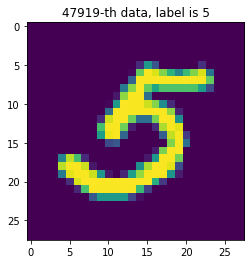

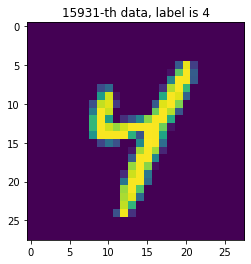

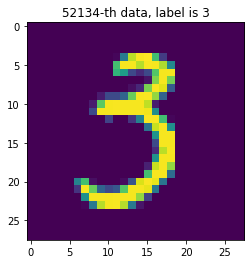

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

sample_size = 3
# 0~59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

for idx in random_idx:
    img = x_train[idx, :]
    label = y_train[idx]
    plt.figure()
    plt.imshow(img)
    plt.title('%d-th data, label is %d' % (idx,label))


검증 데이터 만들기

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, 
                                                  random_state = 777)
print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')



훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


모델 입력을 위한 전처리

0 ~ 225 사이의 값을
0 ~ 1 사이의 값으로 전처리

제일 좋은 방법은 모든 값을 225로 나눠준다


In [ ]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경합니다


(42000, 784)


In [ ]:
from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)


[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
# 784차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense 층
model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망



소프트맥스와 시그모이드 값의 비교 - 예제


In [ ]:
import numpy as np
# 소프트맥스 함수
def softmax(arr):
    m = np.max(arr)
    arr = arr - m # exp의 오버플로우 방지
    arr = np.exp(arr)
    return arr / np.sum(arr)

# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3) # numpy 소수점 제한
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')


sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


학습과정 실행하기

In [ ]:
model.compile(optimizer='adam', # 옵티마이저 : Adam
              loss = 'categorical_crossentropy', # 손실 함수 : categorical_crossentropy
              metrics=['acc']) # 모니터링 할 평가지표 : acc


모델 학습 시키기

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs = 30, 
                    batch_size = 128, # 배치 사이즈가 줄어들면 학습 크기가 늘어난다
                    validation_data = (x_val, y_val))


Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.5112 - acc: 0.8571 - val_loss: 0.2556 - val_acc: 0.9278
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2129 - acc: 0.9396 - val_loss: 0.1932 - val_acc: 0.9439
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1634 - acc: 0.9511 - val_loss: 0.1676 - val_acc: 0.9518
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1344 - acc: 0.9610 - val_loss: 0.1504 - val_acc: 0.9564
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1130 - acc: 0.9667 - val_loss: 0.1397 - val_acc: 0.9588
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0967 - acc: 0.9719 - val_loss: 0.1271 - val_acc: 0.9621
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0846 - acc: 0.9755 - val_loss: 0.1254 - val_acc: 0.9617
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

history를 통해 확인해볼 수 있는 값 출력하기


In [ ]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

학습 결과 그려보기

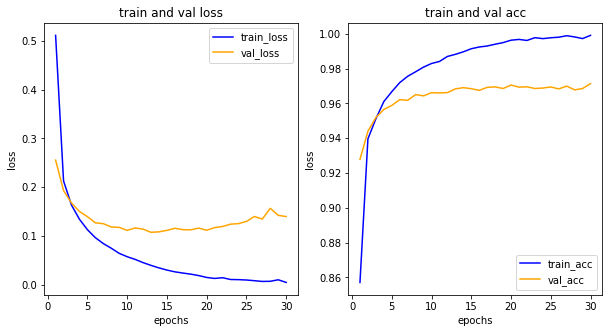

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()


모델 평가

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1435 - acc: 0.9706


[0.1435462087392807, 0.9706000089645386]

학습된 모델을 통해 값 예측하기

In [ ]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')


(10000, 10)
각 클래스에 속할 확률 : 
[2.6142864e-12 6.4734329e-12 7.8537397e-08 1.0535742e-06 6.9822620e-16
 2.5821973e-09 1.0624794e-18 9.9999869e-01 4.5934454e-11 1.6007179e-07]


예측값 그려서 확인해보기


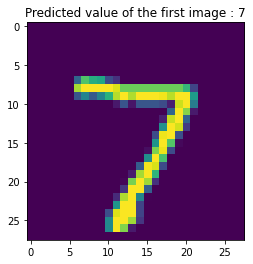

In [ ]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) # 가장 큰 값의 인덱스를 가져옵니다.
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()


모델 평가 방법 1 - 혼동 행렬


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


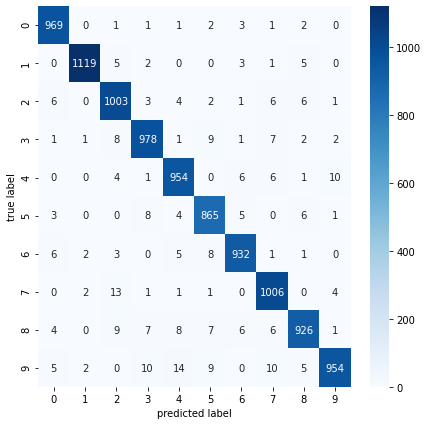

In [ ]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (7, 7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [ ]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))



               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.96      0.97      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

